# **Técnicas de Normalización**

# **1. Estandarización (Z-Score Normalization)**

La estandarización convierte los datos para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media de cada dato y luego dividiendo el resultado por la desviación estándar. La fórmula es:


$z$=$\frac{x-media}{Desviación estándar}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Generar 100 datos que no sigan una distribución normal
# Por ejemplo, usar una distribución log-normal
mu, sigma = 3., 1. # media y desviación estándar
datos = np.random.lognormal(mu, sigma, 100)

# Estandarización
media = np.mean(datos)
desviacion_std = np.std(datos)
datos_estandarizados = (datos - media) / desviacion_std

# Imprimir la media
mensaje = "La media es: {:.2f}".format(media)
print(mensaje)
mensaje = "La desviacion std es: {:.2f}".format(desviacion_std)
print(mensaje)

La media es: 38.79
La desviacion std es: 47.96


In [ ]:
datos

array([  2.92267333,  37.33043696,  24.3973987 ,  40.36662292,
        41.69274813,  51.98639976,   6.65717862,  34.11869053,
        14.05405488,  15.72468743,  64.10795847,  55.61177752,
         9.02080326,  16.22697951,  29.10440826,  87.69303278,
        26.44000213,  33.6930483 ,  15.44824429,  16.4639569 ,
        13.39557289,   4.14931241,  14.16080582,   8.56386128,
         6.00243916,   9.14410982,  24.27208352,  15.30046896,
        32.39383503,   9.32150422, 118.69761121,  23.43884853,
        78.83400201,   7.76534098,  93.03239874,  13.79422421,
        10.81441564,  48.98352005,  12.8061592 ,   3.42134909,
        30.97610386,  19.14566055,  27.1067315 ,  14.05441589,
        17.22266668,  12.90830025,   6.16809292,  33.26667193,
         9.93469219,  11.07306474,  23.43333116,  19.49912218,
         7.79692868,   8.18687041,  28.19878086,  39.28392362,
        96.36988649,  69.23971058,  53.23291811,  35.65035036,
        30.52441522,  62.50486069,  58.43812922,  58.30

In [ ]:
datos_estandarizados

array([-0.74777225, -0.03038596, -0.30003395,  0.03291714,  0.06056625,
        0.27518423, -0.6699095 , -0.09734942, -0.51568798, -0.48085605,
        0.52791324,  0.35077171, -0.620629  , -0.47038349, -0.20189493,
        1.01965136, -0.25744659, -0.10622387, -0.48661977, -0.46544262,
       -0.52941704, -0.72219738, -0.51346228, -0.63015603, -0.68356053,
       -0.61805812, -0.30264671, -0.48970082, -0.13331187, -0.61435952,
        1.66608277, -0.32001929,  0.83494458, -0.64680482,  1.13097472,
       -0.52110534, -0.583233  ,  0.21257555, -0.54170604, -0.73737509,
       -0.16287093, -0.40953031, -0.24354559, -0.51568046, -0.44962386,
       -0.53957645, -0.68010672, -0.11511362, -0.60157483, -0.57784028,
       -0.32013432, -0.4021608 , -0.64614623, -0.63801612, -0.22077685,
        0.01034335,  1.20055983,  0.63490794,  0.30117357, -0.065415  ,
       -0.17228843,  0.49448937,  0.40969987,  0.40692976, -0.38453668,
       -0.66867741, -0.43153586, -0.57271709, -0.70294963, -0.38

In [ ]:
media = np.mean(datos_estandarizados)
desviacion_std = np.std(datos_estandarizados)

# Imprimir la media
mensaje = "La media es: {:.2f}".format(media)
print(mensaje)
mensaje = "La desviacion std es: {:.2f}".format(desviacion_std)
print(mensaje)

La media es: -0.00
La desviacion std es: 1.00


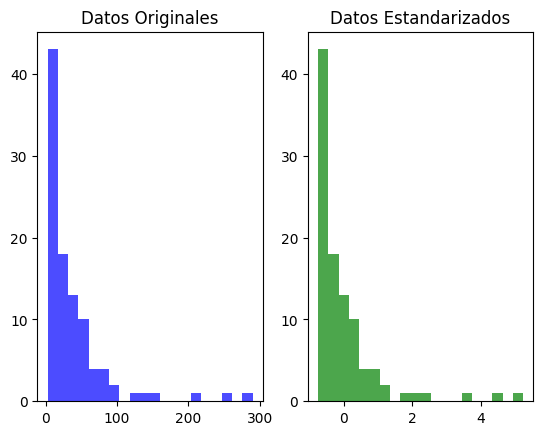

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(datos, bins=20, color='blue', alpha=0.7)
plt.title('Datos Originales')

plt.subplot(1, 2, 2)
plt.hist(datos_estandarizados, bins=20, color='green', alpha=0.7)
plt.title('Datos Estandarizados')

plt.show()


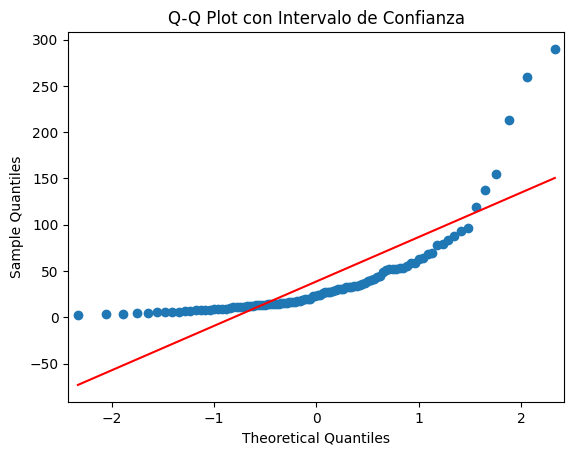

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(datos, line='s', ax=ax)
plt.title("Q-Q Plot con Intervalo de Confianza")
plt.show()

In [ ]:
shapiro_test = stats.shapiro(datos)
print("Shapiro-Wilk Test:\n Estadístico =", shapiro_test[0], "\nP-valor =", shapiro_test[1])

Shapiro-Wilk Test:
 Estadístico = 0.6391674280166626 
P-valor = 2.543375496918531e-14


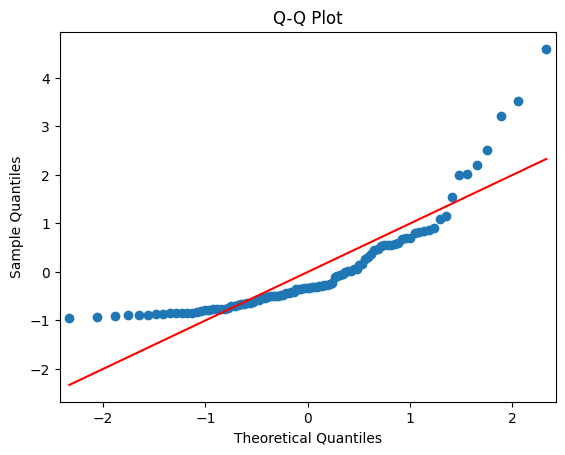

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(datos_estandarizados, line='s', ax=ax)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
shapiro_test = stats.shapiro(datos_estandarizados)
print("Shapiro-Wilk Test:\n Estadístico =", shapiro_test[0], "\nP-valor =", shapiro_test[1])

Shapiro-Wilk Test:
 Estadístico = 0.639167308807373 
P-valor = 2.5433661795561113e-14


In [ ]:
# Transformación Box-Cox
datos_boxcox, _ = stats.boxcox(datos)

# Para Yeo-Johnson (puede manejar ceros y negativos)
datos_yeojohnson, _ = stats.yeojohnson(datos)


In [ ]:
# prompt: generar un data frame con las variables datos, datos_estandarizados, datos_boxcox y datos_yeojojnson

import pandas as pd
df = pd.DataFrame({
    'datos': datos,
    'datos_estandarizados': datos_estandarizados,
    'datos_boxcox': datos_boxcox,
    'datos_yeojohnson': datos_yeojohnson
})


In [ ]:
df.head(20)

,datos,datos_estandarizados,datos_boxcox,datos_yeojohnson
0,2.922673,-0.747772,1.020126,1.239084
1,37.330437,-0.030386,3.067455,2.827497
2,24.397399,-0.300034,2.758825,2.578342
3,40.366623,0.032917,3.122862,2.872022
4,41.692748,0.060566,3.145647,2.890308
5,51.986400,0.275184,3.299348,3.013249
6,6.657179,-0.669910,1.736150,1.761102
7,34.118691,-0.097349,3.003202,2.775769
8,14.054055,-0.515688,2.339742,2.239375
9,15.724687,-0.480856,2.426858,2.309677


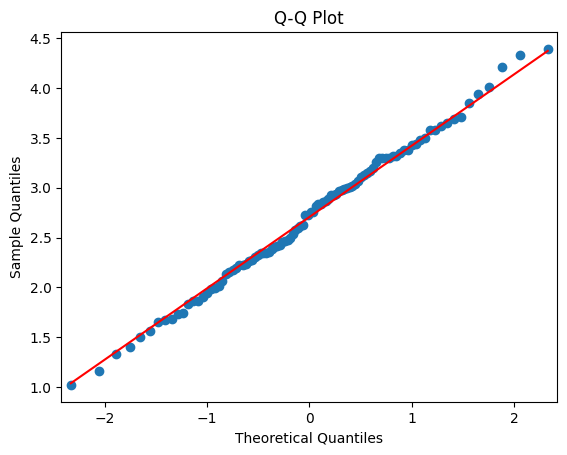

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(datos_boxcox, line='s', ax=ax)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
shapiro_test = stats.shapiro(datos_boxcox)
print("Shapiro-Wilk Test:\n Estadístico =", shapiro_test[0], "\nP-valor =", shapiro_test[1])

Shapiro-Wilk Test:
 Estadístico = 0.9938372373580933 
P-valor = 0.933044970035553


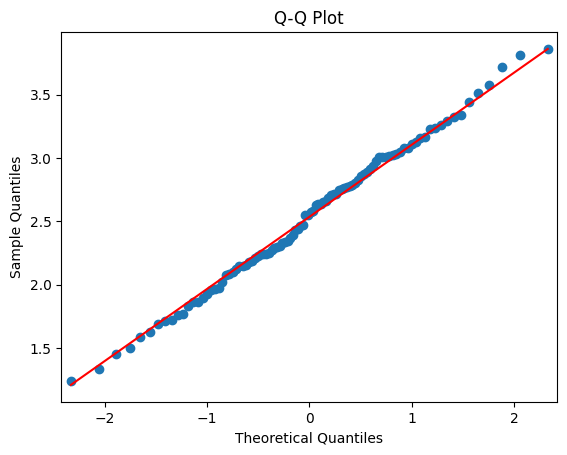

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(datos_yeojohnson, line='s', ax=ax)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
shapiro_test = stats.shapiro(datos_yeojohnson)
print("Shapiro-Wilk Test:\n Estadístico =", shapiro_test[0], "\nP-valor =", shapiro_test[1])

Shapiro-Wilk Test:
 Estadístico = 0.9924657940864563 
P-valor = 0.8538561463356018


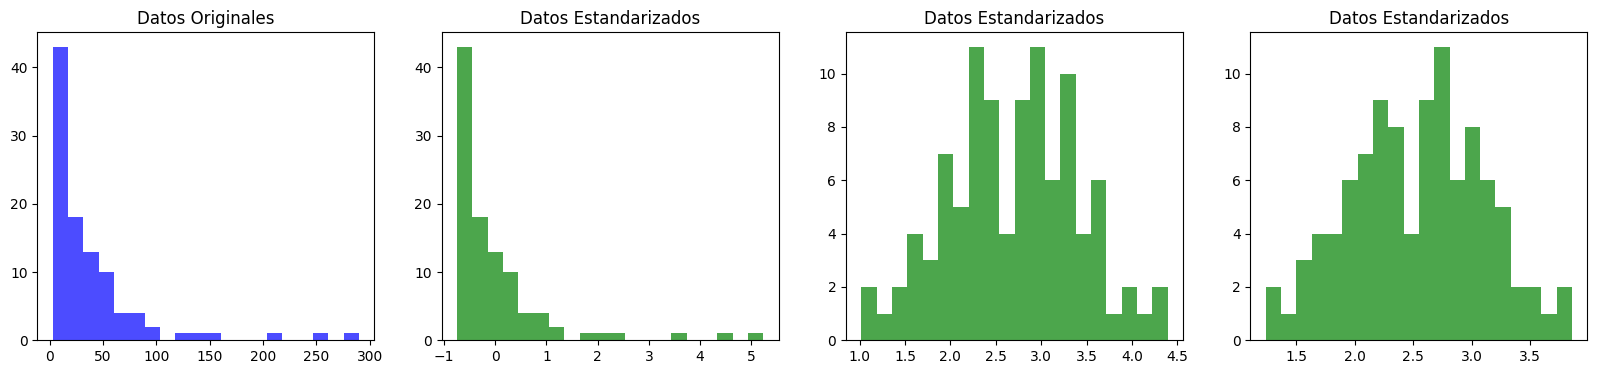

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.hist(datos, bins=20, color='blue', alpha=0.7)
plt.title('Datos Originales')

plt.subplot(1, 4, 2)
plt.hist(datos_estandarizados, bins=20, color='green', alpha=0.7)
plt.title('Datos Estandarizados')

plt.subplot(1, 4, 3)
plt.hist(datos_boxcox, bins=20, color='green', alpha=0.7)
plt.title('Datos Estandarizados')

plt.subplot(1, 4, 4)
plt.hist(datos_yeojohnson, bins=20, color='green', alpha=0.7)
plt.title('Datos Estandarizados')

plt.show()

Las transformaciones de Box-Cox y Yeo-Johnson son técnicas que se utilizan para estabilizar la varianza, acercar los datos a una distribución normal y hacer que las relaciones entre variables sean más lineales. Son especialmente útiles en la preparación de datos para modelos lineales, donde las suposiciones de normalidad y homocedasticidad (varianza constante) son importantes.